# Customer Chrun

### Load the necessary libraries. Import and load the dataset with Customer Churn Dataset .

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
from   pylab                           import  rcParams
from   scipy                           import  stats
from   imblearn.under_sampling         import  RandomUnderSampler
from   imblearn.over_sampling          import  RandomOverSampler
from   imblearn.over_sampling          import  SMOTE
from   sklearn.preprocessing           import  OneHotEncoder
from   sklearn                         import  preprocessing
from   sklearn.preprocessing           import  MinMaxScaler
from   sklearn                         import  datasets
from   sklearn                         import  metrics
from   sklearn.metrics                 import  classification_report
from   sklearn.metrics                 import  confusion_matrix
from   sklearn.metrics                 import  plot_confusion_matrix
from   sklearn.metrics                 import  ConfusionMatrixDisplay
from   sklearn.svm                     import  OneClassSVM
from   sklearn.model_selection         import  train_test_split
from   mlxtend.plotting                import  plot_decision_regions
from   collections                     import  Counter
from   sklearn.model_selection         import train_test_split, cross_val_score, GridSearchCV
from   sklearn.preprocessing           import OneHotEncoder, StandardScaler
from   sklearn.preprocessing           import OrdinalEncoder
from   sklearn.impute                  import SimpleImputer
from   sklearn.pipeline                import Pipeline
from   sklearn.feature_selection       import SelectKBest
from   sklearn.compose                 import ColumnTransformer
from   sklearn.metrics                 import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from   sklearn.ensemble                import GradientBoostingClassifier


import os

### Set Size for displaying the Graph

In [2]:
rcParams['figure.figsize']=10,10

### Set Outliers 

In [3]:
lowerOutlier = 0.01
upperOutlier = 0.99

## Fetch Data from the excel

In [4]:
raw_df = pd.read_excel('Customer_Churn_Data.xlsx', sheet_name='Data for DSBA')

### Data overview

In [5]:
raw_df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


### Column Overview

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
raw_df.shape

(11260, 19)

In [8]:
raw_df.shape[0]*raw_df.shape[1]

213940

### Check for nil

In [9]:
raw_df.isna().any()

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

In [10]:
raw_df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

## Data Cleaning 
#### For the analysis we need to remove the na values from the data set.

In [11]:
# droping all na values from the dataset
raw_df.dropna(inplace= True)

# checking dataset after the droping na values.
raw_df.info()
raw_df.shape[0]*raw_df.shape[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                8705 non-null   int64  
 1   Churn                    8705 non-null   int64  
 2   Tenure                   8705 non-null   object 
 3   City_Tier                8705 non-null   float64
 4   CC_Contacted_LY          8705 non-null   float64
 5   Payment                  8705 non-null   object 
 6   Gender                   8705 non-null   object 
 7   Service_Score            8705 non-null   float64
 8   Account_user_count       8705 non-null   object 
 9   account_segment          8705 non-null   object 
 10  CC_Agent_Score           8705 non-null   float64
 11  Marital_Status           8705 non-null   object 
 12  rev_per_month            8705 non-null   object 
 13  Complain_ly              8705 non-null   float64
 14  rev_growth_yoy         

165395

In [12]:
raw_df.isna().any()

AccountID                  False
Churn                      False
Tenure                     False
City_Tier                  False
CC_Contacted_LY            False
Payment                    False
Gender                     False
Service_Score              False
Account_user_count         False
account_segment            False
CC_Agent_Score             False
Marital_Status             False
rev_per_month              False
Complain_ly                False
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect       False
cashback                   False
Login_device               False
dtype: bool

In [13]:
raw_df.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [14]:
raw_df.isnull().sum().sum()

0

In [15]:
raw_df.isna().any().sum()

0

## Checking for features.

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                8705 non-null   int64  
 1   Churn                    8705 non-null   int64  
 2   Tenure                   8705 non-null   object 
 3   City_Tier                8705 non-null   float64
 4   CC_Contacted_LY          8705 non-null   float64
 5   Payment                  8705 non-null   object 
 6   Gender                   8705 non-null   object 
 7   Service_Score            8705 non-null   float64
 8   Account_user_count       8705 non-null   object 
 9   account_segment          8705 non-null   object 
 10  CC_Agent_Score           8705 non-null   float64
 11  Marital_Status           8705 non-null   object 
 12  rev_per_month            8705 non-null   object 
 13  Complain_ly              8705 non-null   float64
 14  rev_growth_yoy         

In [17]:
raw_df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

## checking the feature unique element

In [18]:
raw_df.Login_device.unique()

array(['Mobile', 'Computer', '&&&&'], dtype=object)

In [19]:
mapping = {'Mobile': 'Mobile', 'Computer': 'Computer', '&&&&': 'Unknown'}
raw_df.Login_device = [mapping[item] for item in raw_df.Login_device]
raw_df.Login_device.unique()

array(['Mobile', 'Computer', 'Unknown'], dtype=object)

In [20]:
raw_df.Gender.unique()

array(['Female', 'Male', 'M', 'F'], dtype=object)

In [21]:
mapping = {'M': 'Male', 'Male': 'Male', 'F': 'Female', 'Female':'Female'}
raw_df.Gender = [mapping[item] for item in raw_df.Gender]
raw_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [22]:
raw_df.account_segment.unique()

array(['Super', 'Regular Plus', 'HNI', 'Regular', 'Super Plus', 'Super +',
       'Regular +'], dtype=object)

In [23]:
mapping = {'Super Plus': 'Super Plus', 'Super +': 'Super Plus', 'Super': 'Super', 'Regular': 'Regular', 'Regular Plus': 'Regular Plus', 'Regular +': 'Regular Plus', 'HNI':'HNI'}
raw_df.account_segment = [mapping[item] for item in raw_df.account_segment]
raw_df.account_segment.unique()

array(['Super', 'Regular Plus', 'HNI', 'Regular', 'Super Plus'],
      dtype=object)

In [24]:
raw_df.replace({'-': np.nan, '@': np.nan, '+': np.nan, '$': np.nan, '#': np.nan, '*': np.nan}, inplace= True)

raw_df['AccountID'].fillna(value=raw_df['AccountID'].mean(), inplace=True)
raw_df['Tenure'].fillna(value=raw_df['Tenure'].mean(), inplace=True)
raw_df['CC_Contacted_LY'].fillna(value=raw_df['CC_Contacted_LY'].mean(), inplace=True)
raw_df['Service_Score'].fillna(value=raw_df['Service_Score'].mean(), inplace=True)
raw_df['Account_user_count'].fillna(value=raw_df['Account_user_count'].mean(), inplace=True)
raw_df['CC_Agent_Score'].fillna(value=raw_df['CC_Agent_Score'].mean(), inplace=True)
raw_df['rev_per_month'].fillna(value=raw_df['rev_per_month'].mean(), inplace=True)
raw_df['Complain_ly'].fillna(value=raw_df['Complain_ly'].mean(), inplace=True)
raw_df['rev_growth_yoy'].fillna(value=raw_df['rev_growth_yoy'].mean(), inplace=True)
raw_df['coupon_used_for_payment'].fillna(value=raw_df['coupon_used_for_payment'].mean(), inplace=True)
raw_df['Day_Since_CC_connect'].fillna(value=raw_df['Day_Since_CC_connect'].mean(), inplace=True)
raw_df['cashback'].fillna(value=raw_df['cashback'].mean(), inplace=True)

In [25]:
raw_df['Churn'] = raw_df['Churn'].values.astype(str)
raw_df['Tenure'] = raw_df['Tenure'].astype('int')
raw_df['Account_user_count'] = raw_df['Account_user_count'].astype('int')
raw_df['rev_per_month'] = raw_df['rev_per_month'].astype('int')
# raw_df['Churn'] = raw_df['Churn'].astype('int')
raw_df['City_Tier'] = raw_df['City_Tier'].astype(str)
raw_df['Complain_ly'] = raw_df['Complain_ly'].astype('int')
raw_df['rev_growth_yoy'] = raw_df['rev_growth_yoy'].astype('int')
raw_df['coupon_used_for_payment'] = raw_df['coupon_used_for_payment'].astype('int')
raw_df['Day_Since_CC_connect'] = raw_df['Day_Since_CC_connect'].astype('int')
raw_df['cashback'] = raw_df['cashback'].astype('int')
raw_df.dtypes

AccountID                    int64
Churn                       object
Tenure                       int64
City_Tier                   object
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count           int64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month                int64
Complain_ly                  int64
rev_growth_yoy               int64
coupon_used_for_payment      int64
Day_Since_CC_connect         int64
cashback                     int64
Login_device                object
dtype: object

In [26]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                8705 non-null   int64  
 1   Churn                    8705 non-null   object 
 2   Tenure                   8705 non-null   int64  
 3   City_Tier                8705 non-null   object 
 4   CC_Contacted_LY          8705 non-null   float64
 5   Payment                  8705 non-null   object 
 6   Gender                   8705 non-null   object 
 7   Service_Score            8705 non-null   float64
 8   Account_user_count       8705 non-null   int64  
 9   account_segment          8705 non-null   object 
 10  CC_Agent_Score           8705 non-null   float64
 11  Marital_Status           8705 non-null   object 
 12  rev_per_month            8705 non-null   int64  
 13  Complain_ly              8705 non-null   int64  
 14  rev_growth_yoy         

In [27]:
raw_df.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [28]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AccountID,8705.0,25630.755428,3257.227853,20000.0,22792.0,25647.0,28454.0,31259.0
Tenure,8705.0,11.387823,13.760636,0.0,2.0,9.0,16.0,99.0
CC_Contacted_LY,8705.0,17.886157,8.904764,4.0,11.0,16.0,23.0,132.0
Service_Score,8705.0,2.904423,0.726539,0.0,2.0,3.0,3.0,5.0
Account_user_count,8705.0,3.667203,1.022657,1.0,3.0,4.0,4.0,6.0
CC_Agent_Score,8705.0,3.058817,1.382246,1.0,2.0,3.0,4.0,5.0
rev_per_month,8705.0,6.628030,12.965725,1.0,3.0,5.0,7.0,140.0
Complain_ly,8705.0,0.283056,0.450509,0.0,0.0,0.0,1.0,1.0
rev_growth_yoy,8705.0,16.188627,3.760712,4.0,13.0,15.0,19.0,28.0
coupon_used_for_payment,8705.0,1.798736,1.995324,0.0,1.0,1.0,2.0,16.0


In [29]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                8705 non-null   int64  
 1   Churn                    8705 non-null   object 
 2   Tenure                   8705 non-null   int64  
 3   City_Tier                8705 non-null   object 
 4   CC_Contacted_LY          8705 non-null   float64
 5   Payment                  8705 non-null   object 
 6   Gender                   8705 non-null   object 
 7   Service_Score            8705 non-null   float64
 8   Account_user_count       8705 non-null   int64  
 9   account_segment          8705 non-null   object 
 10  CC_Agent_Score           8705 non-null   float64
 11  Marital_Status           8705 non-null   object 
 12  rev_per_month            8705 non-null   int64  
 13  Complain_ly              8705 non-null   int64  
 14  rev_growth_yoy         

## EDA

In [30]:
# Let's calculate the percentage of each Account types status category.
raw_df.account_segment.value_counts(normalize=True)

Regular Plus    0.369787
Super           0.362895
HNI             0.146008
Super Plus      0.074785
Regular         0.046525
Name: account_segment, dtype: float64

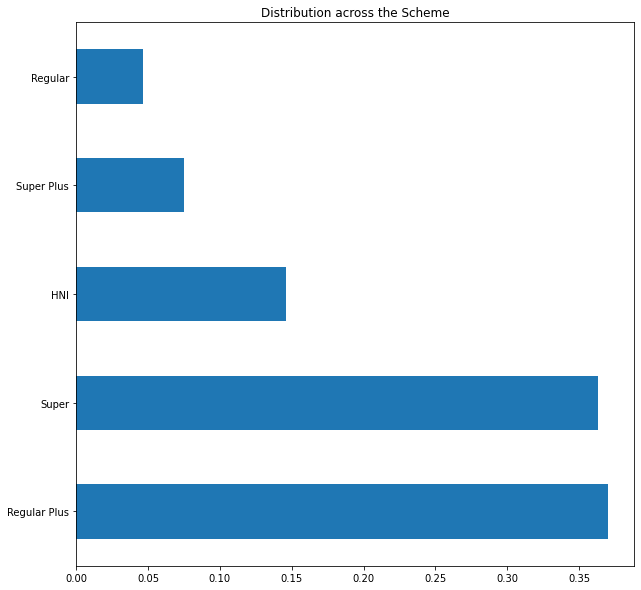

In [31]:
#plot the bar graph of percentage Account types categories
raw_df.account_segment.value_counts(normalize=True).plot.barh(title='Distribution across the Scheme')
plt.show()

### Distribution across City

In [32]:
#City_Tier
raw_df.City_Tier.value_counts(normalize=True)

1.0    0.65112
3.0    0.30672
2.0    0.04216
Name: City_Tier, dtype: float64

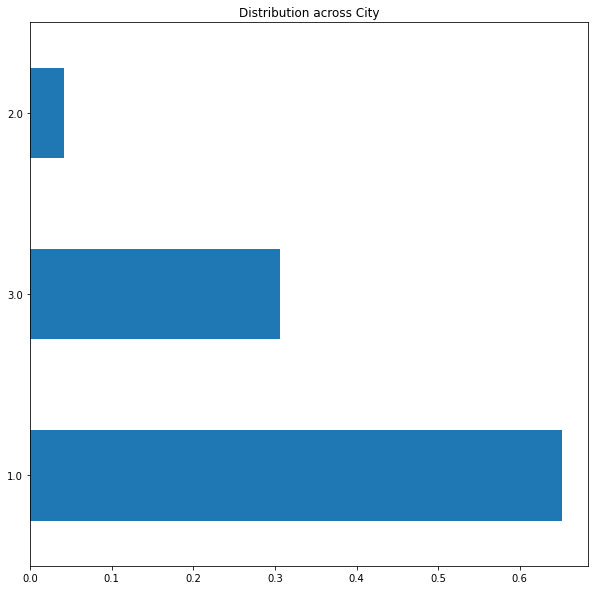

In [33]:
raw_df.City_Tier.value_counts(normalize=True).plot.barh(title='Distribution across City')
plt.show()

### Distribution across the genders

In [34]:
raw_df.Gender.value_counts(normalize=True)

Male      0.603906
Female    0.396094
Name: Gender, dtype: float64

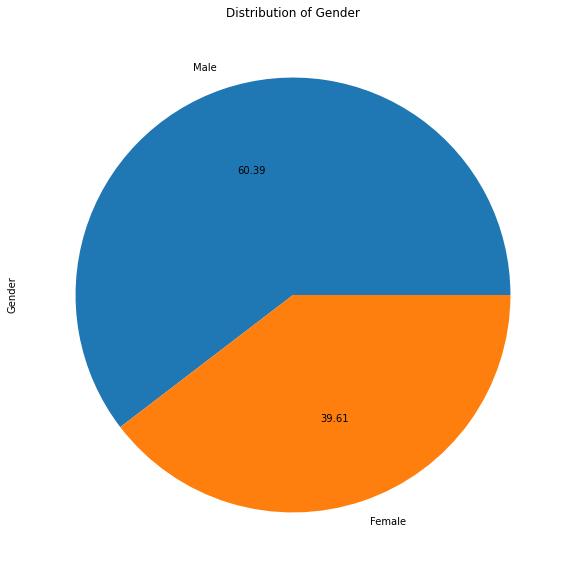

In [35]:
raw_df.Gender.value_counts(normalize=True).plot.pie(title='Distribution of Gender', autopct= '%0.2f')
plt.show()

### Distribution accross marital status

In [36]:
raw_df.Marital_Status.value_counts(normalize=True)

Married     0.531419
Single      0.319127
Divorced    0.149454
Name: Marital_Status, dtype: float64

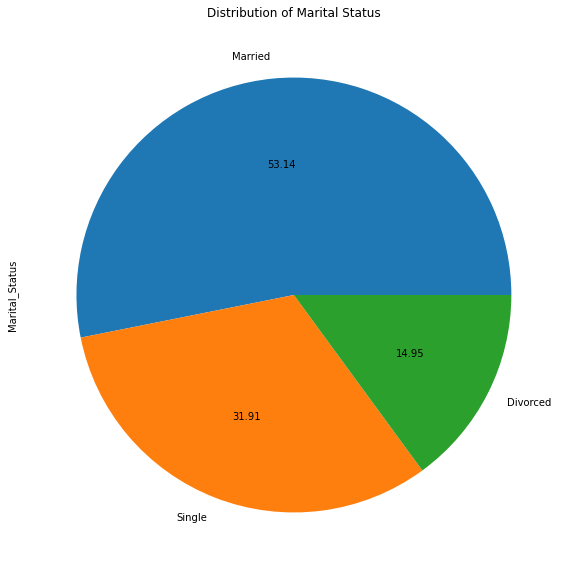

In [37]:
raw_df.Marital_Status.value_counts(normalize=True).plot.pie(title='Distribution of Marital Status', autopct= '%0.2f')
plt.show()

### Distribution on the type of login

In [38]:
raw_df.Login_device.value_counts(normalize=True)

Mobile      0.684319
Computer    0.277542
Unknown     0.038139
Name: Login_device, dtype: float64

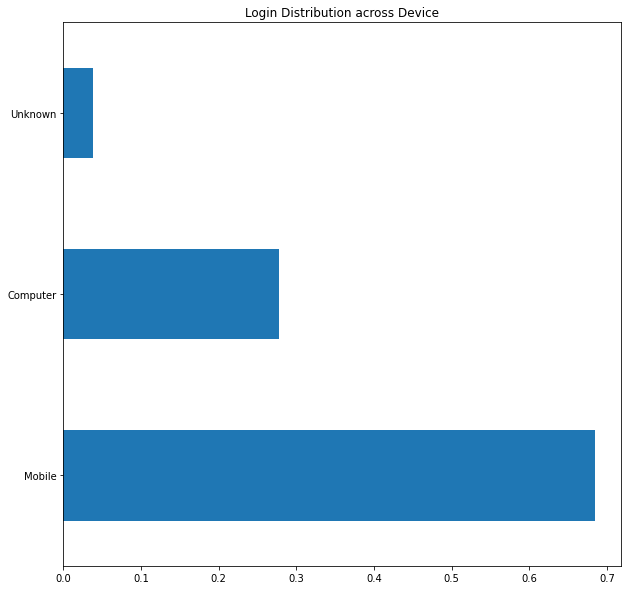

In [39]:
raw_df.Login_device.value_counts(normalize=True).plot.barh(title='Login Distribution across Device')
plt.show()

### Distribution on the type of Payement

In [40]:
raw_df.Payment.value_counts(normalize=True)

Debit Card          0.413211
Credit Card         0.314187
E wallet            0.109248
Cash on Delivery    0.089948
UPI                 0.073406
Name: Payment, dtype: float64

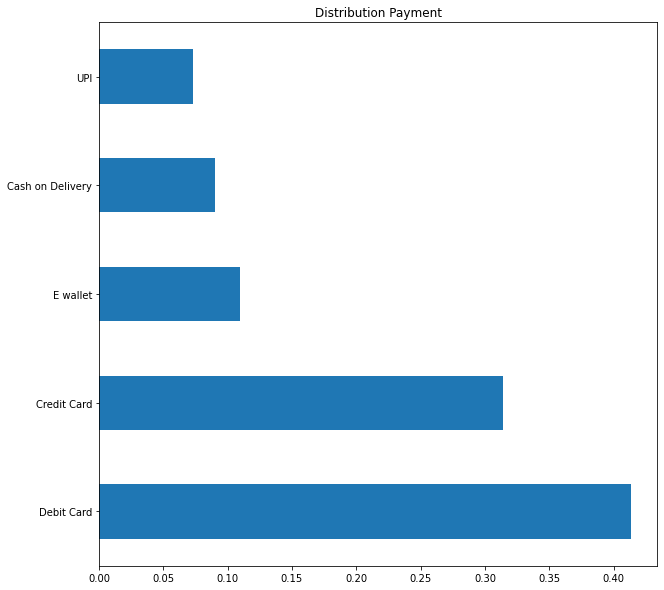

In [41]:
raw_df.Payment.value_counts(normalize=True).plot.barh(title='Distribution Payment')
plt.show()

### Distribution on the type of Churn

In [42]:
raw_df.Churn.value_counts(normalize=True)

0    0.833659
1    0.166341
Name: Churn, dtype: float64

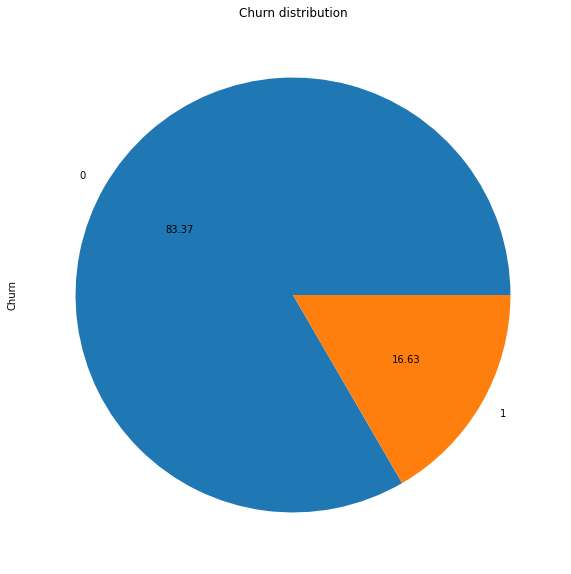

In [43]:
raw_df.Churn.value_counts(normalize=True).plot.pie(title='Churn distribution', autopct= '%0.2f')
plt.show()

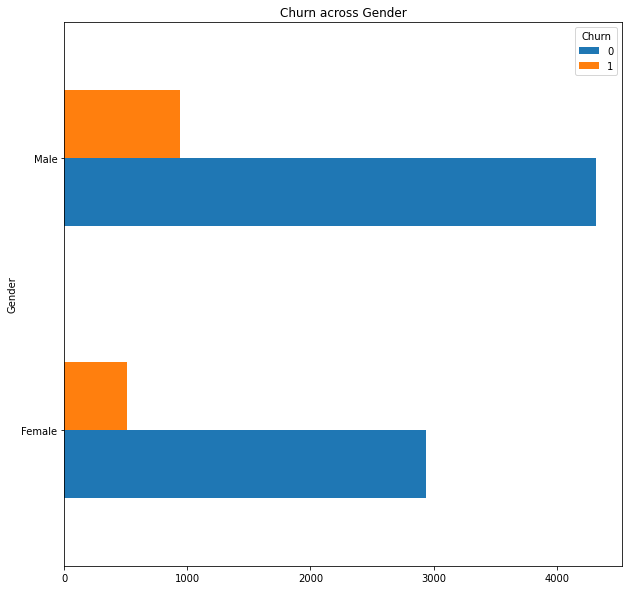

In [44]:
data_gender = raw_df
# rcParams['figure.figsize']=5,5
data_gender.groupby(['Gender','Churn']).count()['AccountID'].unstack().plot.barh(title='Churn across Gender')
plt.show()

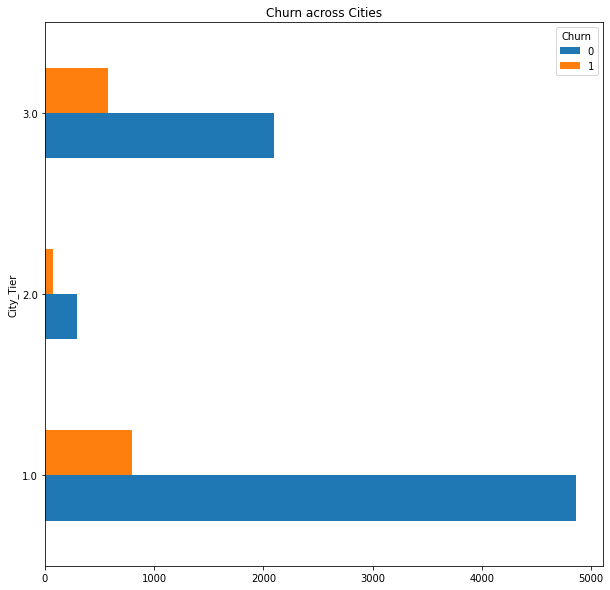

In [45]:
data_cities = raw_df
data_cities.groupby(['City_Tier','Churn'])['AccountID'].count().unstack().plot.barh(title='Churn across Cities')
plt.show()

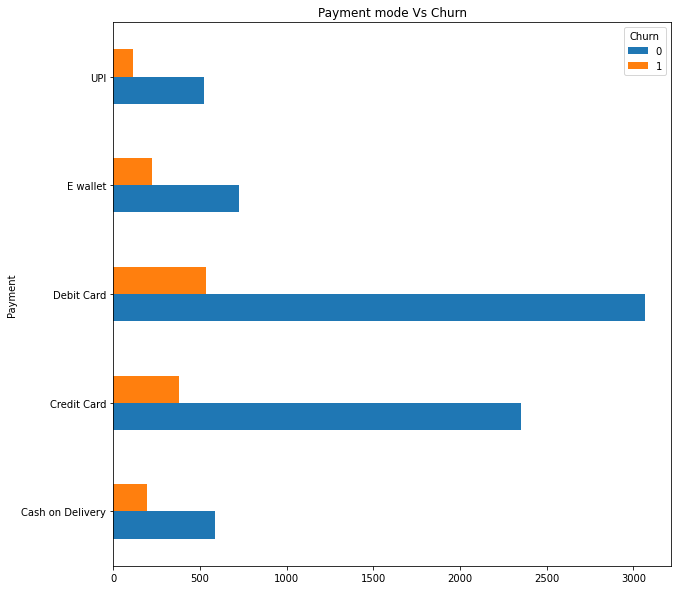

In [46]:
data_payments = raw_df
data_payments.groupby(['Payment','Churn'])['AccountID'].count().unstack().plot.barh(title='Payment mode Vs Churn')
plt.show()

In [47]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                8705 non-null   int64  
 1   Churn                    8705 non-null   object 
 2   Tenure                   8705 non-null   int64  
 3   City_Tier                8705 non-null   object 
 4   CC_Contacted_LY          8705 non-null   float64
 5   Payment                  8705 non-null   object 
 6   Gender                   8705 non-null   object 
 7   Service_Score            8705 non-null   float64
 8   Account_user_count       8705 non-null   int64  
 9   account_segment          8705 non-null   object 
 10  CC_Agent_Score           8705 non-null   float64
 11  Marital_Status           8705 non-null   object 
 12  rev_per_month            8705 non-null   int64  
 13  Complain_ly              8705 non-null   int64  
 14  rev_growth_yoy         

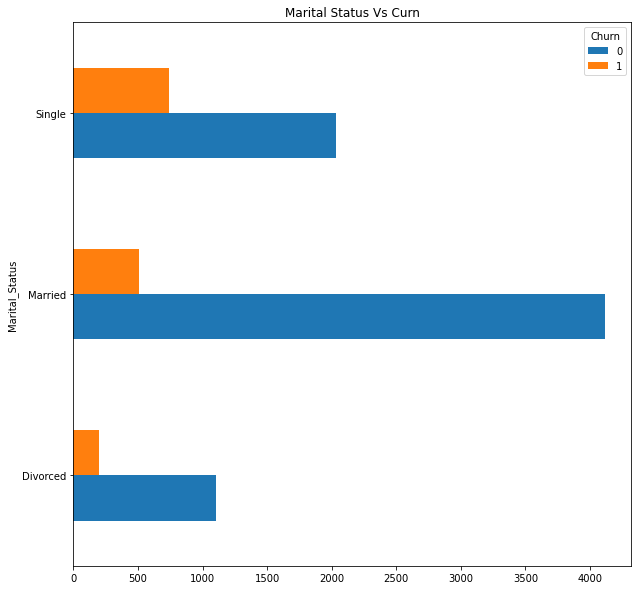

In [48]:
data_lifestyle = raw_df
data_lifestyle.groupby(['Marital_Status','Churn']).count()['AccountID'].unstack().plot.barh(title='Marital Status Vs Curn')
plt.show()

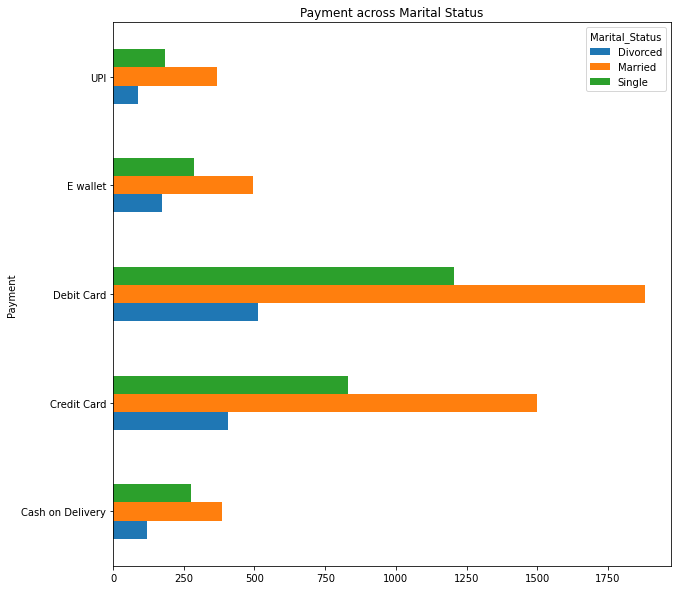

In [49]:
data_payments_marital_status = raw_df
data_payments_marital_status.groupby(['Payment','Marital_Status'])['AccountID'].count().unstack().plot.barh(title='Payment across Marital Status')
plt.show()

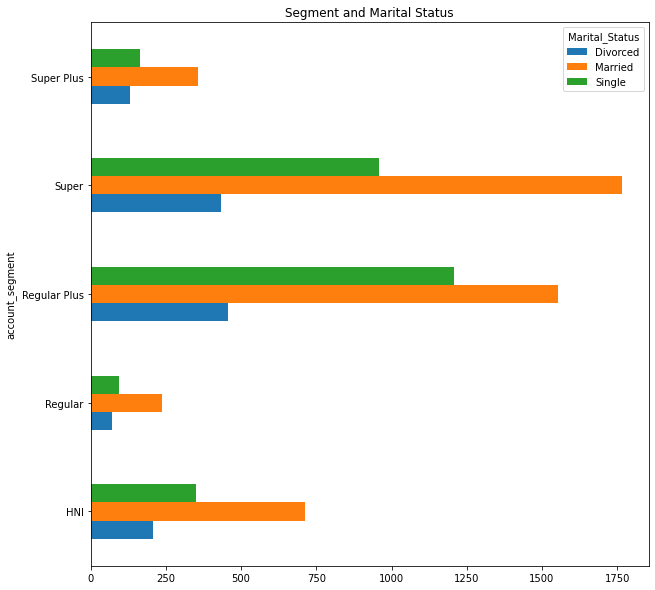

In [50]:
data_segment_marital_status = raw_df
data_segment_marital_status.groupby(['account_segment','Marital_Status'])['AccountID'].count().unstack().plot.barh(title='Segment and Marital Status')
plt.show()

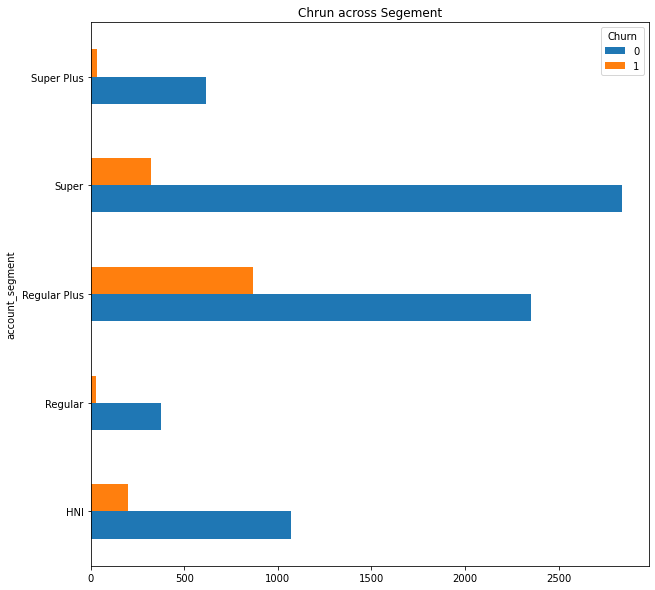

In [51]:
data_segment_chrun = raw_df
data_segment_chrun.groupby(['account_segment','Churn'])['AccountID'].count().unstack().plot.barh(title='Chrun across Segement')
plt.show()

### Multiple Component anlysis

In [52]:
import prince

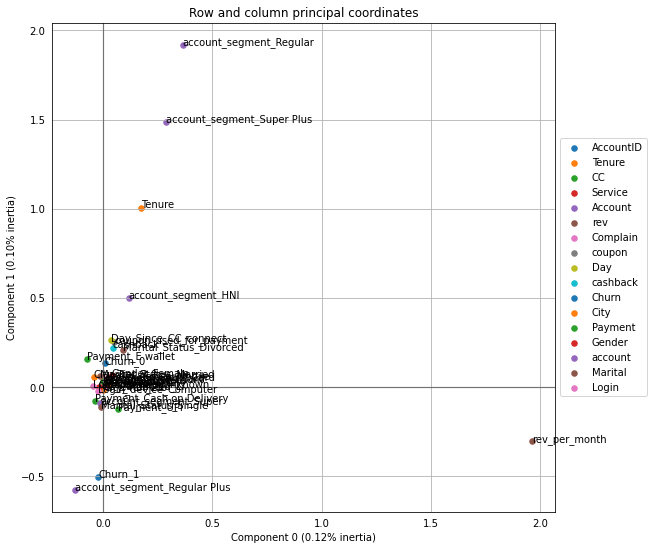

In [53]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(raw_df)

ax = churn_mca.plot_coordinates(
        X=raw_df,
        ax=None,
        figsize=(9, 9),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

numpy.ndarray

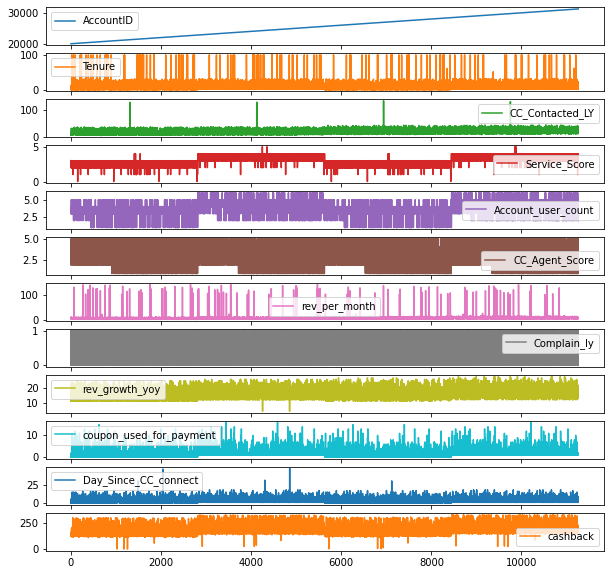

In [54]:
axes = raw_df.plot.line(subplots=True)
# rcParams['figure.figsize']=20,30
type(axes)

In [55]:
def remove_over_limit(df_in, col_name, limit):
    df_out = df_in.where(df_in[col_name] < limit)
    return df_out

In [56]:
raw_df = remove_over_limit(raw_df, 'Day_Since_CC_connect', 20)

In [57]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(lowerOutlier) # lower quantile limit
    q3 = df_in[col_name].quantile(upperOutlier) # upper quantile limit
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [58]:
def remove_outlier_for(df_in, col_array):
    df_out = df_in
    for name in col_array:
        df_out = remove_outlier(df_out, name)
    return df_out

In [59]:
one_hot_only_numeric = raw_df.select_dtypes(exclude=['object'])
col_name = one_hot_only_numeric.columns
col_name

Index(['AccountID', 'Tenure', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [60]:
raw_df = remove_outlier_for(raw_df, col_name)
corr_df = raw_df
corr_df['Churn'] = corr_df['Churn'].astype('int')

In [61]:
corr_df.drop(corr_df[['Tenure', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']], axis = 1, inplace = True)

In [62]:
cc_core_data = corr_df.loc[:, ~raw_df.columns.isin(['AccountID'])]

In [63]:
cc_core_data_corr = cc_core_data.corr(method ='pearson')
cc_core_data_corr.transpose()

,Churn,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly
Churn,1.000000,0.071455,0.005746,0.096083,0.097130,0.022689,0.258579
CC_Contacted_LY,0.071455,1.000000,0.058653,0.015367,0.002477,0.014742,0.022222
Service_Score,0.005746,0.058653,1.000000,0.316394,0.030572,0.022140,0.001521
Account_user_count,0.096083,0.015367,0.316394,1.000000,-0.015861,0.021003,0.000252
CC_Agent_Score,0.097130,0.002477,0.030572,-0.015861,1.000000,0.019932,-0.035210
rev_per_month,0.022689,0.014742,0.022140,0.021003,0.019932,1.000000,-0.001963
Complain_ly,0.258579,0.022222,0.001521,0.000252,-0.035210,-0.001963,1.000000


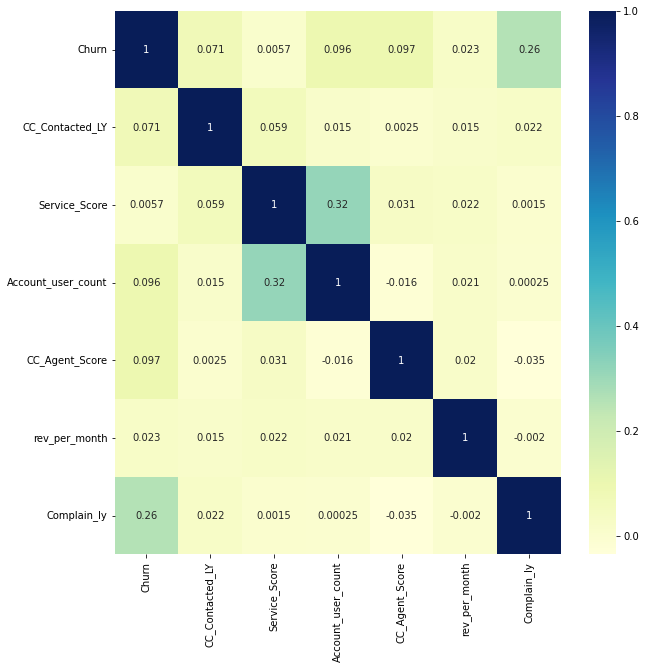

In [64]:
dataplot_cc_core = sns.heatmap(cc_core_data_corr, cmap="YlGnBu", annot=True)

plt.title = 'Correlation Matrix'
# displaying heatmap
plt.show()

## writing to CSV file.

In [65]:
raw_df.to_csv('Customer_Churn_Data_Output.csv', index = None, header=True)

### **Class distribution**

In [66]:
X = raw_df.drop(['Churn'], axis=1)
y = raw_df['Churn']

In [67]:
y.value_counts()

0    7250
1    1446
Name: Churn, dtype: int64

<AxesSubplot:title={'center':'Churn Distribution'}, ylabel='Churn'>

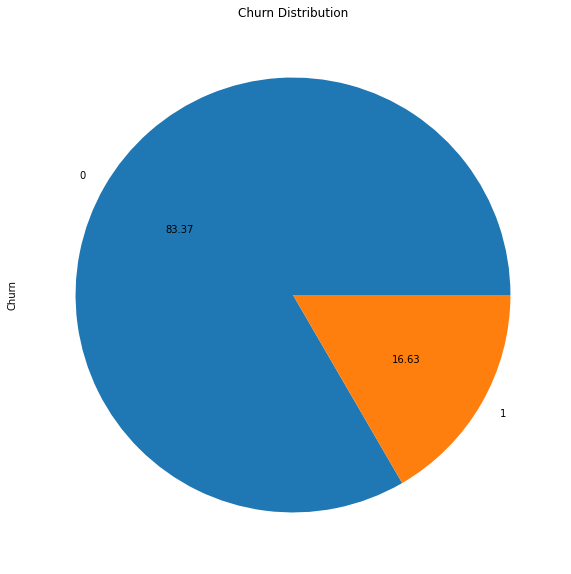

In [68]:
y.value_counts().plot.pie(title='Churn Distribution', autopct='%.2f')
# rcParams['figure.figsize']=20,10

### **Random Oversampling**

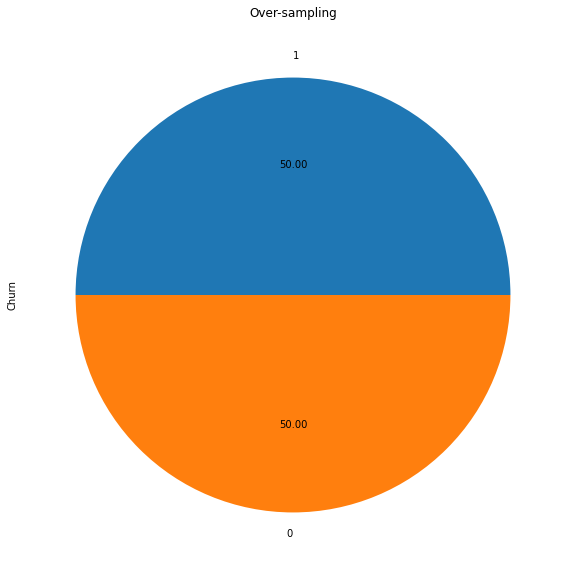

In [70]:
ros = RandomOverSampler(sampling_strategy="not majority") # by adding data point to class which is minor %
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [71]:
over_sampling_data = y_res
over_sampling_data.value_counts()

1    7250
0    7250
Name: Churn, dtype: int64

In [72]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 11259
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountID           8696 non-null   float64
 1   Churn               8696 non-null   int64  
 2   City_Tier           8696 non-null   object 
 3   CC_Contacted_LY     8696 non-null   float64
 4   Payment             8696 non-null   object 
 5   Gender              8696 non-null   object 
 6   Service_Score       8696 non-null   float64
 7   Account_user_count  8696 non-null   float64
 8   account_segment     8696 non-null   object 
 9   CC_Agent_Score      8696 non-null   float64
 10  Marital_Status      8696 non-null   object 
 11  rev_per_month       8696 non-null   float64
 12  Complain_ly         8696 non-null   float64
 13  Login_device        8696 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1019.1+ KB


In [73]:
over_sampling_df = raw_df

In [74]:
over_sampling_df['Churn'] =  over_sampling_data

over_sampling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 11259
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountID           8696 non-null   float64
 1   Churn               8696 non-null   int64  
 2   City_Tier           8696 non-null   object 
 3   CC_Contacted_LY     8696 non-null   float64
 4   Payment             8696 non-null   object 
 5   Gender              8696 non-null   object 
 6   Service_Score       8696 non-null   float64
 7   Account_user_count  8696 non-null   float64
 8   account_segment     8696 non-null   object 
 9   CC_Agent_Score      8696 non-null   float64
 10  Marital_Status      8696 non-null   object 
 11  rev_per_month       8696 non-null   float64
 12  Complain_ly         8696 non-null   float64
 13  Login_device        8696 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1019.1+ KB


In [75]:
one_hot_only_numeric = over_sampling_df.select_dtypes(exclude=['object'])
col_name = one_hot_only_numeric.columns
col_name

Index(['AccountID', 'Churn', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly'],
      dtype='object')

In [76]:
# filtered_data_df = remove_outlier_for(over_sampling_df, col_name)
filtered_data_df = over_sampling_df


In [77]:
filtered_data_df = filtered_data_df.drop(columns=['City_Tier', 'Gender', 'Marital_Status'])
filtered_data_df.drop(filtered_data_df.columns[[0]], axis = 1, inplace = True)

In [78]:
# sns.pairplot(data = filtered_data_df, vars = filtered_data_df.columns)
# plt.show()

## One-Hot Encoding

In [79]:
filtered_data_df['Churn'] = filtered_data_df['Churn'].values.astype(int)

In [80]:
one_hot_encoded_training_predictors = pd.get_dummies(filtered_data_df)

one_hot_encoded_training_predictors

,Churn,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Computer,Login_device_Mobile,Login_device_Unknown
0,1,6.0,3.0,3.0,2.0,9.0,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,1,8.0,3.0,4.0,3.0,7.0,1.0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,15.0,2.0,4.0,5.0,8.0,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,1,12.0,2.0,3.0,5.0,3.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0
6,1,11.0,2.0,3.0,2.0,4.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1,34.0,3.0,2.0,1.0,9.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0
11256,1,19.0,3.0,5.0,5.0,7.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0
11257,1,14.0,3.0,2.0,4.0,7.0,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0
11258,1,11.0,4.0,5.0,4.0,7.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [81]:
one_hot_encoded_training_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 11259
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         8696 non-null   int64  
 1   CC_Contacted_LY               8696 non-null   float64
 2   Service_Score                 8696 non-null   float64
 3   Account_user_count            8696 non-null   float64
 4   CC_Agent_Score                8696 non-null   float64
 5   rev_per_month                 8696 non-null   float64
 6   Complain_ly                   8696 non-null   float64
 7   Payment_Cash on Delivery      8696 non-null   uint8  
 8   Payment_Credit Card           8696 non-null   uint8  
 9   Payment_Debit Card            8696 non-null   uint8  
 10  Payment_E wallet              8696 non-null   uint8  
 11  Payment_UPI                   8696 non-null   uint8  
 12  account_segment_HNI           8696 non-null   uint8  
 13  ac

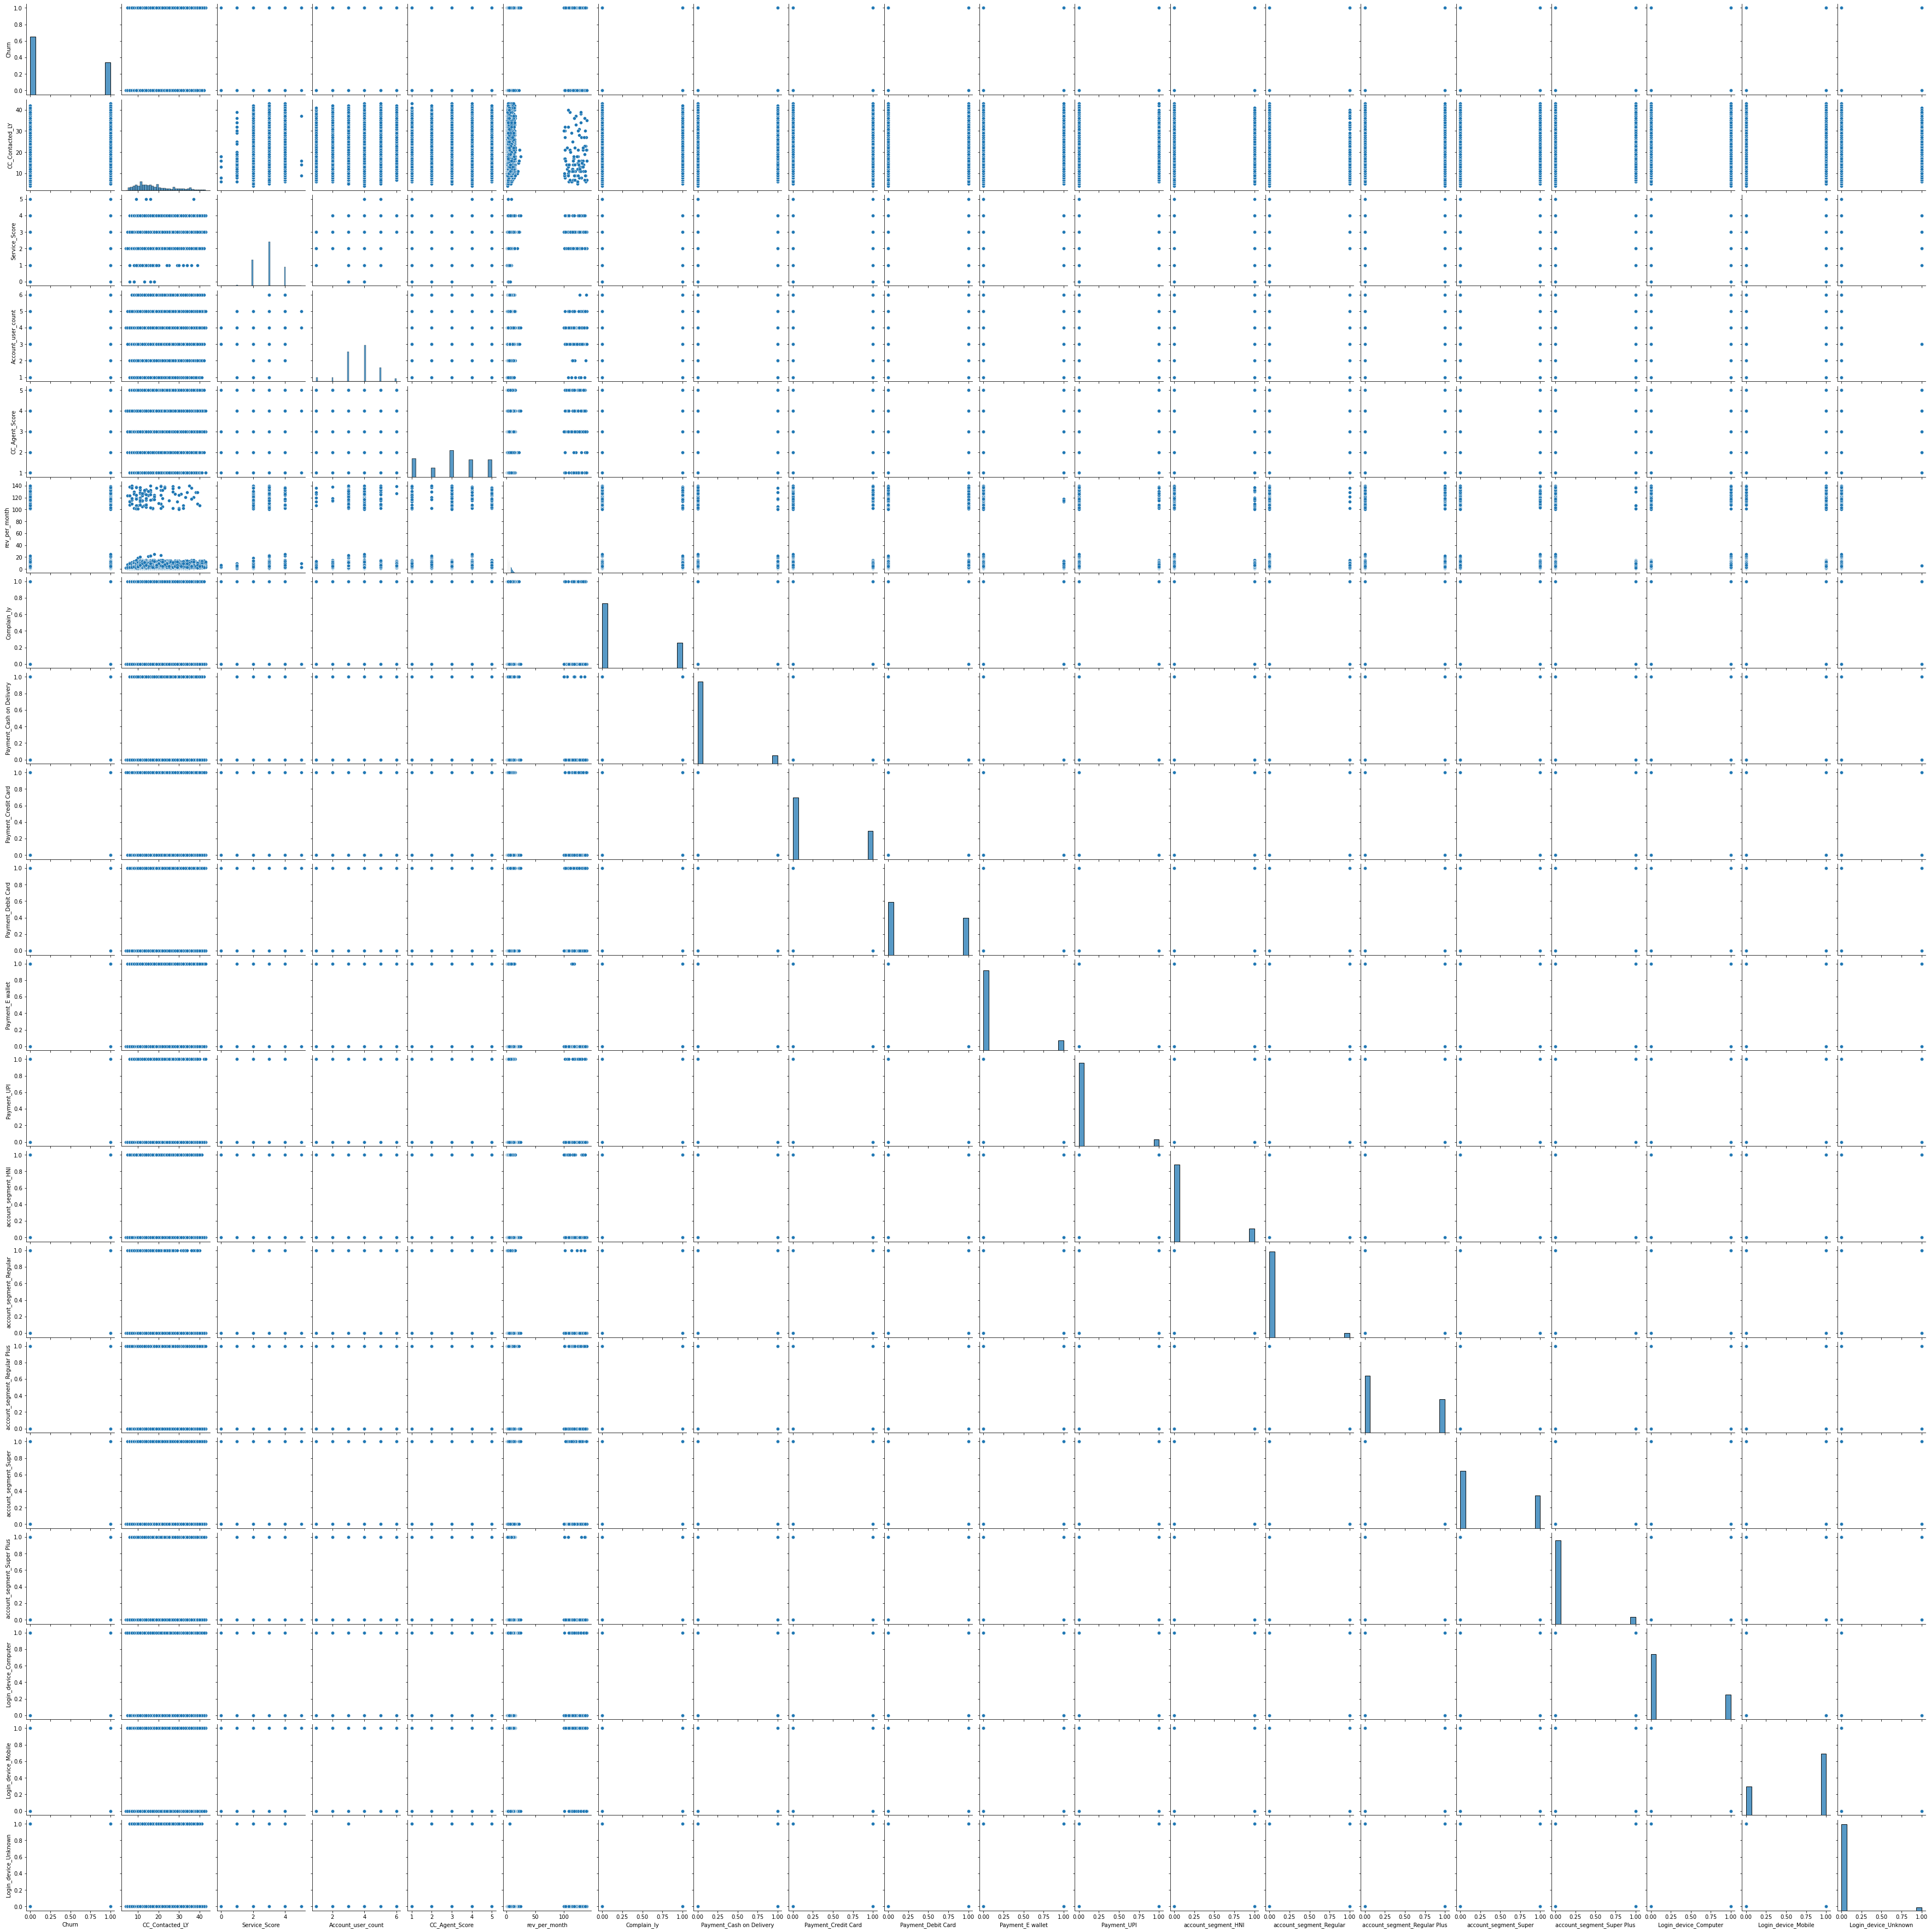

In [82]:
sns.pairplot(data = one_hot_encoded_training_predictors, vars = one_hot_encoded_training_predictors.columns)
plt.show()

In [83]:
one_hot_encoded_training_predictors

,Churn,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Computer,Login_device_Mobile,Login_device_Unknown
0,1,6.0,3.0,3.0,2.0,9.0,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,1,8.0,3.0,4.0,3.0,7.0,1.0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,15.0,2.0,4.0,5.0,8.0,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,1,12.0,2.0,3.0,5.0,3.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0
6,1,11.0,2.0,3.0,2.0,4.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1,34.0,3.0,2.0,1.0,9.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0
11256,1,19.0,3.0,5.0,5.0,7.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0
11257,1,14.0,3.0,2.0,4.0,7.0,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0
11258,1,11.0,4.0,5.0,4.0,7.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0


### Scaling and Normalize Data

In [85]:
scaled_data = one_hot_encoded_training_predictors
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(scaled_data) 
one_hot_encoded_training_predictors.loc[:,:] = scaled_values

scaled_data = one_hot_encoded_training_predictors

In [86]:
# normalize the data attributes
# scaled_data = scaled_data.drop('Churn', axis=1)
unnormalized_data = scaled_data.values
normalized = preprocessing.normalize(unnormalized_data)

In [87]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [88]:
scaled_data1 = scaled_data.drop(['Churn'], axis=1)
normalized_data = normalize(scaled_data1)
normalized_data = pd.concat([scaled_data['Churn'], normalized_data], axis=1)
normalized_data


,Churn,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Computer,Login_device_Mobile,Login_device_Unknown
0,1.0,0.051282,0.6,0.4,0.25,0.057554,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.102564,0.6,0.6,0.50,0.043165,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.282051,0.4,0.6,1.00,0.050360,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.205128,0.4,0.4,1.00,0.014388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.179487,0.4,0.4,0.25,0.021583,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1.0,0.769231,0.6,0.2,0.00,0.057554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11256,1.0,0.384615,0.6,0.8,1.00,0.043165,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11257,1.0,0.256410,0.6,0.2,0.75,0.043165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11258,1.0,0.179487,0.8,0.8,0.75,0.043165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [89]:
normalized_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,8696.0,0.357061,0.479160,0.0,0.000000,0.000000,1.000000,1.0
CC_Contacted_LY,8696.0,0.354858,0.220131,0.0,0.179487,0.307692,0.487179,1.0
Service_Score,8696.0,0.580980,0.145318,0.0,0.400000,0.600000,0.600000,1.0
Account_user_count,8696.0,0.533441,0.204592,0.0,0.400000,0.600000,0.600000,1.0
CC_Agent_Score,8696.0,0.514777,0.345446,0.0,0.250000,0.500000,0.750000,1.0
rev_per_month,8696.0,0.040499,0.093326,0.0,0.014388,0.028777,0.043165,1.0
Complain_ly,8696.0,0.283349,0.450650,0.0,0.000000,0.000000,1.000000,1.0
Payment_Cash on Delivery,8696.0,0.089696,0.285763,0.0,0.000000,0.000000,0.000000,1.0
Payment_Credit Card,8696.0,0.314512,0.464348,0.0,0.000000,0.000000,1.000000,1.0
Payment_Debit Card,8696.0,0.412948,0.492392,0.0,0.000000,0.000000,1.000000,1.0


In [90]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 11259
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         8696 non-null   float64
 1   CC_Contacted_LY               8696 non-null   float64
 2   Service_Score                 8696 non-null   float64
 3   Account_user_count            8696 non-null   float64
 4   CC_Agent_Score                8696 non-null   float64
 5   rev_per_month                 8696 non-null   float64
 6   Complain_ly                   8696 non-null   float64
 7   Payment_Cash on Delivery      8696 non-null   float64
 8   Payment_Credit Card           8696 non-null   float64
 9   Payment_Debit Card            8696 non-null   float64
 10  Payment_E wallet              8696 non-null   float64
 11  Payment_UPI                   8696 non-null   float64
 12  account_segment_HNI           8696 non-null   float64
 13  ac

<AxesSubplot:>

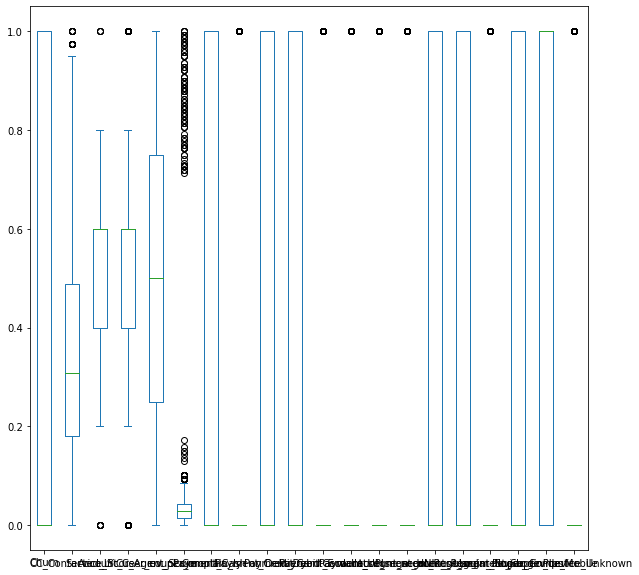

In [91]:
normalized_data.plot.box()

### Correlation matrix

In [92]:
data_correlation = normalized_data.corr(method ='pearson')
data_correlation

,Churn,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Payment_Cash on Delivery,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Computer,Login_device_Mobile,Login_device_Unknown
Churn,1.000000,0.136419,0.281876,0.203036,-0.008256,0.038223,-0.020131,0.018052,-0.005459,-0.000100,-0.005048,-0.003828,0.006044,-0.008667,-0.001432,0.001520,-0.001319,-0.006021,0.004532,0.003076
CC_Contacted_LY,0.136419,1.000000,0.058653,0.015367,0.002477,0.014742,0.022222,-0.003600,0.009407,-0.031003,0.042779,-0.005463,0.031141,-0.071133,-0.063764,0.051559,0.037896,0.003537,-0.009930,0.015819
Service_Score,0.281876,0.058653,1.000000,0.316394,0.030572,0.022140,0.001521,0.002869,-0.003715,0.020416,-0.003833,-0.030470,0.016446,-0.004870,0.026060,-0.017302,-0.034335,-0.009410,0.007848,0.002952
Account_user_count,0.203036,0.015367,0.316394,1.000000,-0.015861,0.021003,0.000252,0.017933,-0.032880,0.001387,0.021429,0.010624,0.039270,0.023892,-0.012126,-0.004136,-0.042013,0.030310,0.024385,-0.129953
CC_Agent_Score,-0.008256,0.002477,0.030572,-0.015861,1.000000,0.019932,-0.035210,0.032882,0.025335,-0.055487,0.014611,0.006134,0.005185,0.005554,0.010889,-0.018814,0.003011,-0.031151,0.032091,-0.005048
rev_per_month,0.038223,0.014742,0.022140,0.021003,0.019932,1.000000,-0.001963,-0.003689,0.012003,-0.002162,-0.029841,0.022452,0.017812,0.011069,-0.027801,0.002964,0.012810,-0.009308,0.012952,-0.009667
Complain_ly,-0.020131,0.022222,0.001521,0.000252,-0.035210,-0.001963,1.000000,-0.011621,-0.001626,-0.011664,0.011885,0.023414,0.005371,-0.004549,0.015272,-0.023930,0.012160,-0.004809,0.006320,-0.004091
Payment_Cash on Delivery,0.018052,-0.003600,0.002869,0.017933,0.032882,-0.003689,-0.011621,1.000000,-0.212625,-0.263272,-0.109995,-0.088401,0.033258,-0.035001,0.065786,-0.054684,-0.037301,-0.019190,0.016563,0.004664
Payment_Credit Card,-0.005459,0.009407,-0.003715,-0.032880,0.025335,0.012003,-0.001626,-0.212625,1.000000,-0.568105,-0.237355,-0.190758,-0.023232,0.021887,0.049153,-0.046626,0.008707,0.002985,-0.005317,0.005922
Payment_Debit Card,-0.000100,-0.031003,0.020416,0.001387,-0.055487,-0.002162,-0.011664,-0.263272,-0.568105,1.000000,-0.293893,-0.236197,-0.015899,-0.011354,0.010457,-0.008986,0.027663,0.025546,-0.019032,-0.013528


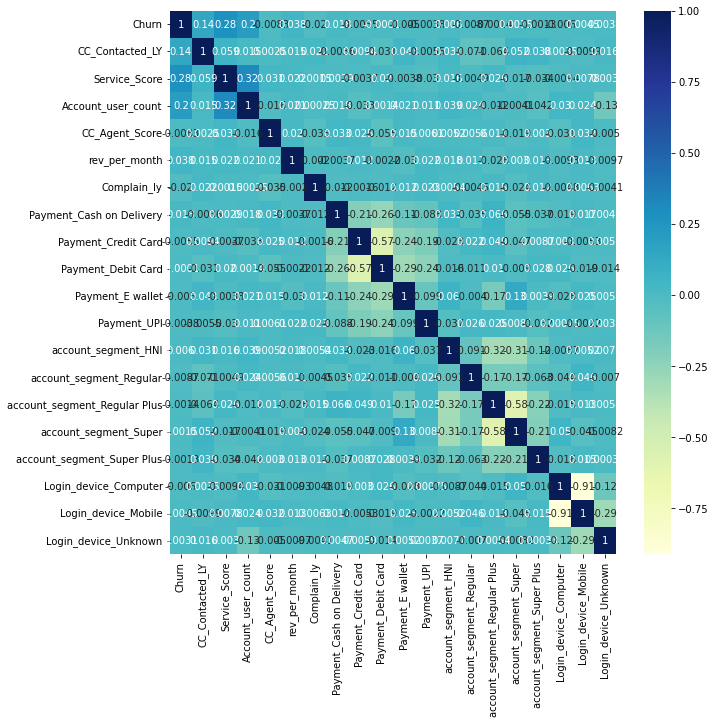

In [93]:
data_correlation_plot = sns.heatmap(data_correlation, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

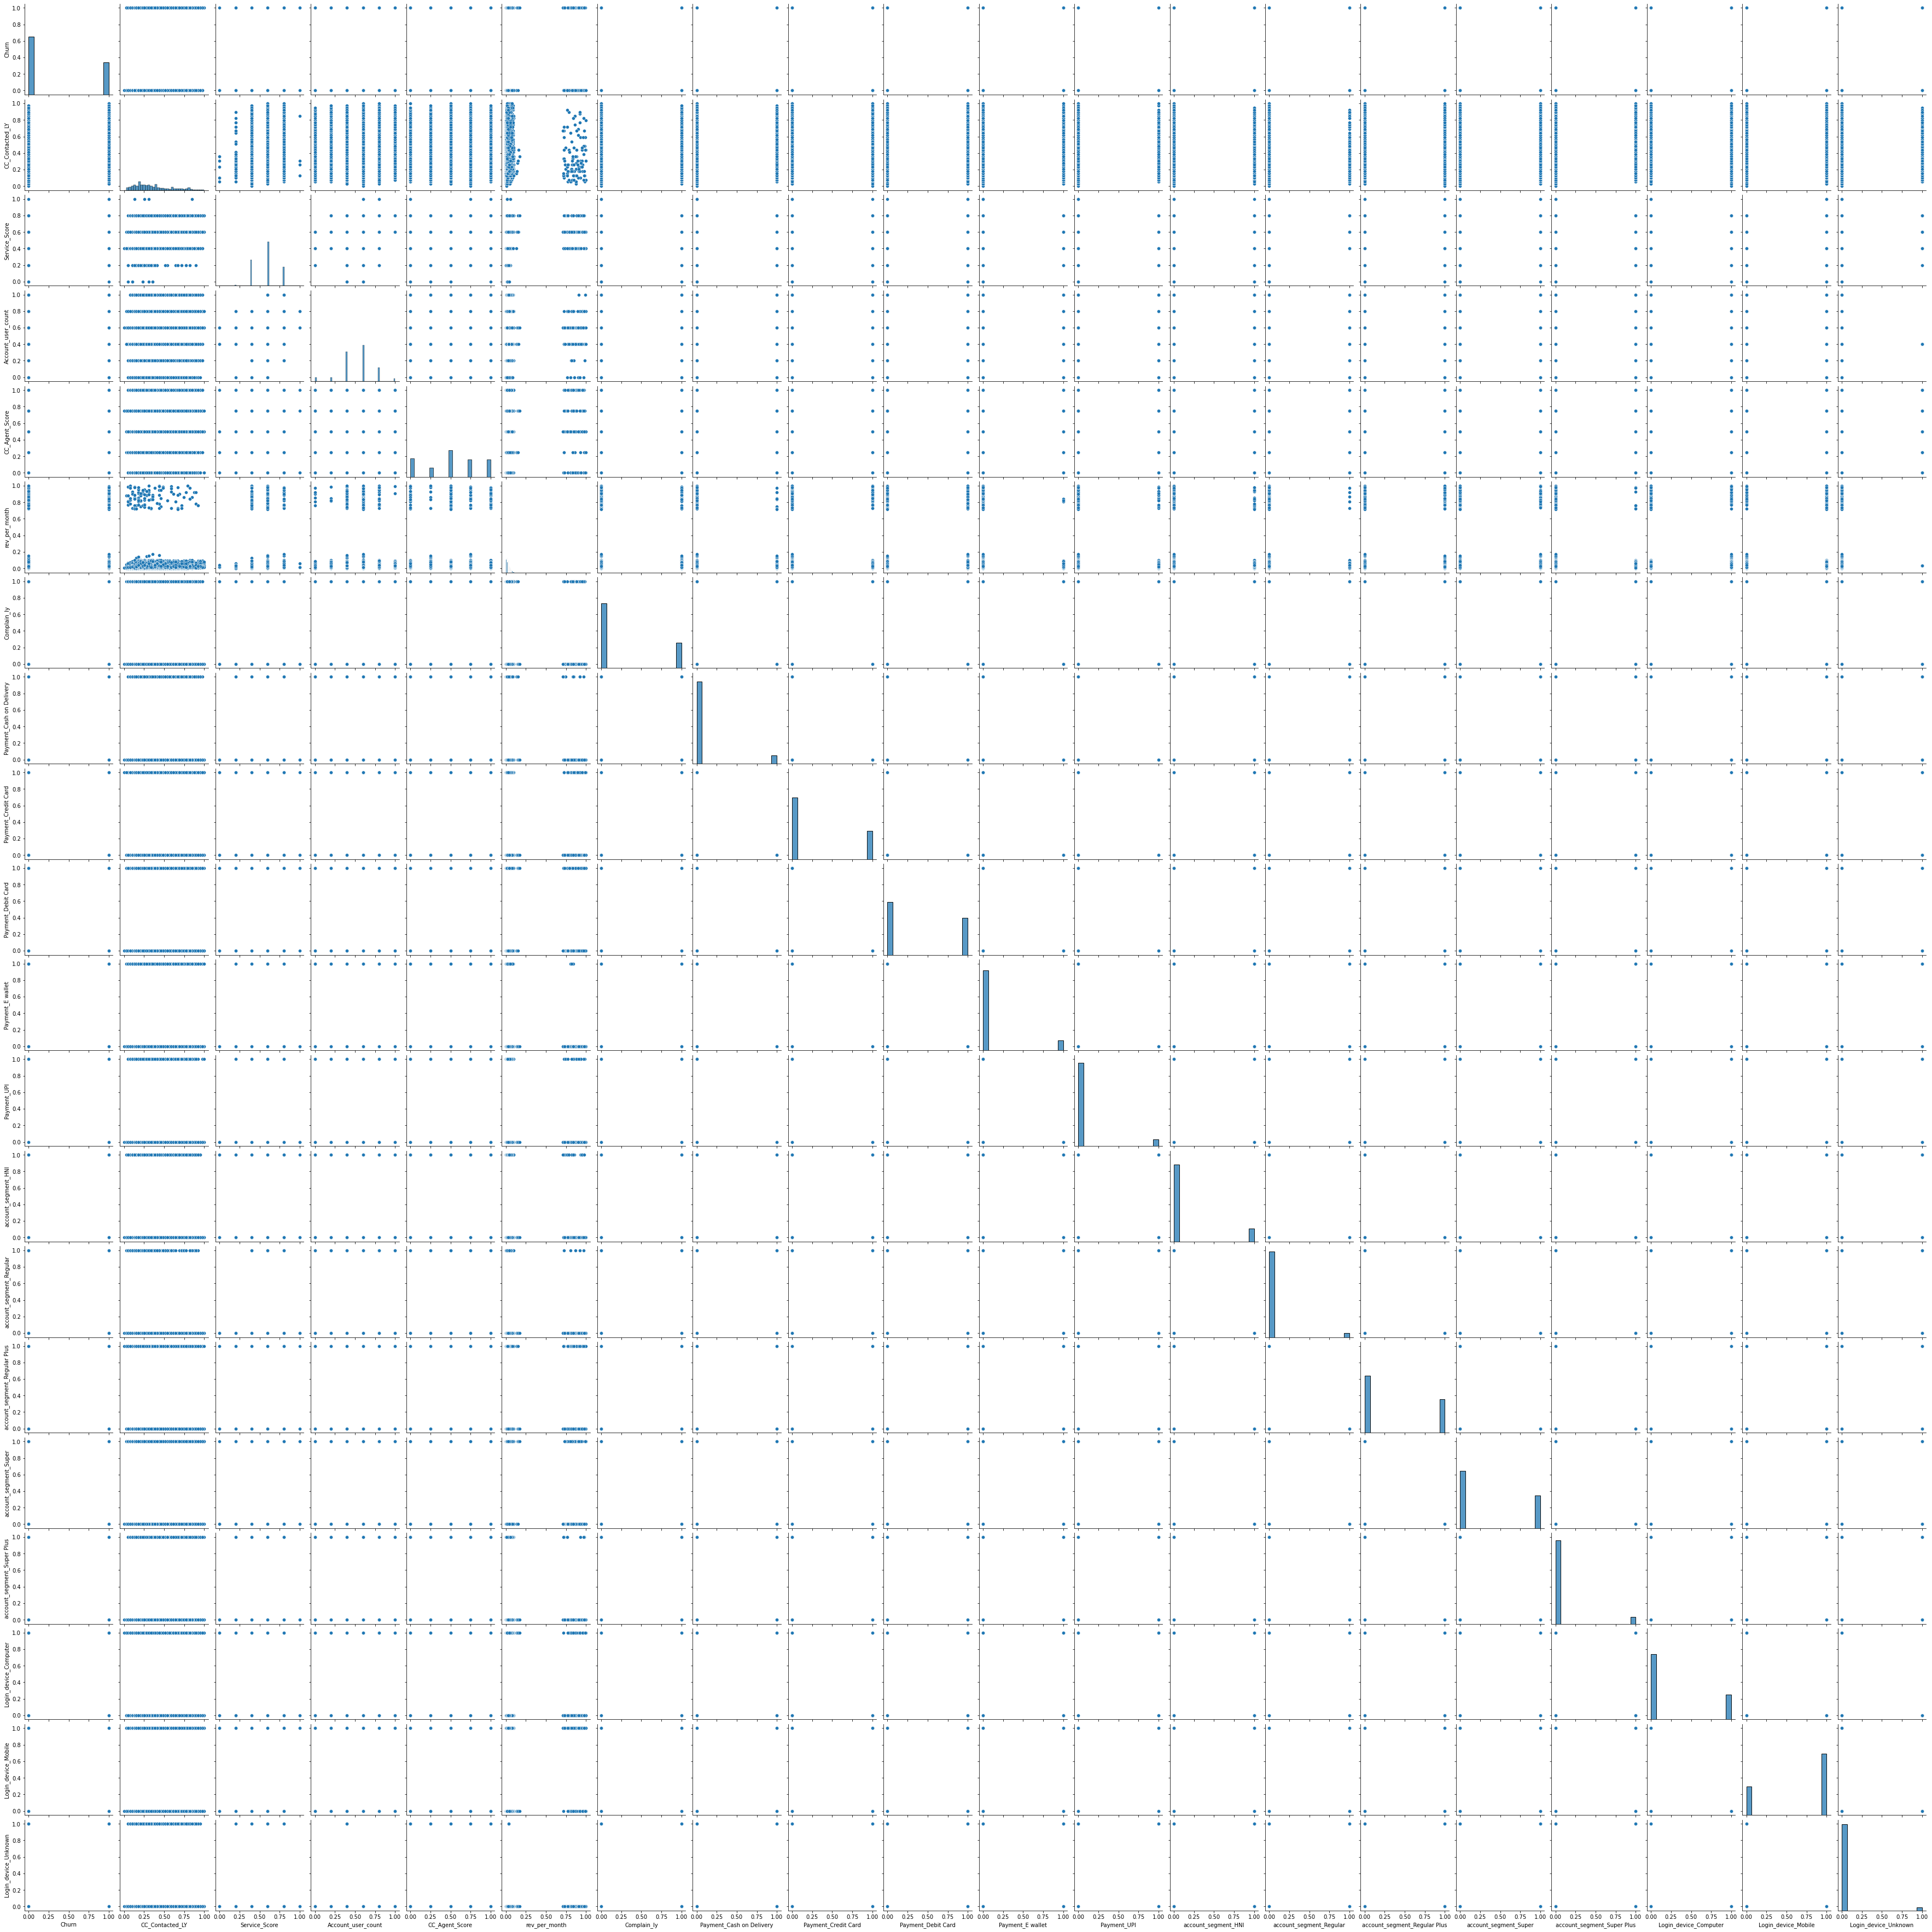

In [94]:
sns.pairplot(data = normalized_data, vars = normalized_data.columns)
plt.show()

## Building Model

In [95]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 11259
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         8696 non-null   float64
 1   CC_Contacted_LY               8696 non-null   float64
 2   Service_Score                 8696 non-null   float64
 3   Account_user_count            8696 non-null   float64
 4   CC_Agent_Score                8696 non-null   float64
 5   rev_per_month                 8696 non-null   float64
 6   Complain_ly                   8696 non-null   float64
 7   Payment_Cash on Delivery      8696 non-null   float64
 8   Payment_Credit Card           8696 non-null   float64
 9   Payment_Debit Card            8696 non-null   float64
 10  Payment_E wallet              8696 non-null   float64
 11  Payment_UPI                   8696 non-null   float64
 12  account_segment_HNI           8696 non-null   float64
 13  ac

In [96]:
# write to csv file
normalized_data.to_csv('Customer_Churn_Data_Normalized_Output.csv', index = None, header=True)

## Model Predication with its output parameters

In [97]:
x1 = normalized_data.drop('Churn', axis = 1)

y1 = normalized_data['Churn']

#Encoding the predicting variable
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(y1)


x_training_data1, x_test_data1, y_training_data1, y_test_data1 = train_test_split(x1, y1, test_size = 0.3)


## Model Generation & fine tuned model

In [98]:
# try installing topt in jupyter notebook
#!pip install tpot
#!pip install torchvision

In [99]:
from sklearn.pipeline         import make_pipeline
from sklearn                  import pipeline
from sklearn.pipeline         import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import KFold   #For K-fold cross validation
from sklearn.model_selection  import StratifiedKFold
from sklearn.tree             import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model     import LogisticRegression
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.svm              import SVC
from sklearn.ensemble         import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble         import AdaBoostClassifier
from sklearn.ensemble         import ExtraTreesClassifier
from xgboost                  import XGBClassifier
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import mean_squared_error
from sklearn.metrics          import precision_score, recall_score
from sklearn.metrics          import f1_score
from sklearn.metrics          import cohen_kappa_score
from tpot                     import TPOTClassifier
import torch
import torchvision

names = [
        "DecisionTree Classifier",
        "Logistic Regression",
        "K Nearest Neighbour Classifier",
        'SVM Classifer',
        "Random Forest Classifier",
        "ExtraTrees Classifier",
        'Gradient Classifier', 
        "AdaBoost Classifier", 
        "XGB Classifier",
        "Double AdaBoost Classifier",
        "TPOT Classifier"
         ]

classifiers = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 10, algorithm='auto', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=10, criterion = 'entropy'),
    ExtraTreesClassifier(max_depth=10, criterion ='entropy'),
    GradientBoostingClassifier(random_state=123),
    AdaBoostClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(base_estimator=AdaBoostClassifier()),
    TPOTClassifier(generations=10, population_size=30, verbosity=2, offspring_size=30, scoring='accuracy', cv=5)
    ]

zipped_clf = zip(names,classifiers)

def printReport(accuracy, f1, kappa, recall, precision):
    print()
    print("Accuracy score : {}%".format(accuracy))
    print("F1_score : {}".format(f1))
    print("Kappa Score : {} ".format(kappa))
    print("Recall score: {}".format(recall))
    print("Precision score : {}".format(precision))

def printAccurarcy(title, accuracy):
    print()
    print("-"*40)
    print(title)
    print("-"*40)
    print()
    print("Accuracy score : {}%".format(accuracy))

def printConfusionMatrix(actual, predict):
    print()
    print('Confusion Matrix :')
    cm = confusion_matrix(actual, predict)
    print(cm)
    print()

    
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
    
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    printAccurarcy('Train Set Metrics', train_accuracy)
    # print(classification_report(y_train, y_pred_train))
    printConfusionMatrix(y_train, y_pred_train)
    printReport(train_accuracy, train_F1, train_kappa, train_recall, train_precision)
    
    
    printAccurarcy('Validation Set Metrics', val_accuracy)
    # print(classification_report(y_val, y_pred_val))
    printConfusionMatrix(y_val, y_pred_val)
    printReport(val_accuracy, val_F1, val_kappa, val_recall, val_precision)
    
    printAccurarcy('Test Set Metrics', test_accuracy)
    # print(classification_report(y_test, y_pred_test))
    printConfusionMatrix(y_test, y_pred_test)
    printReport(test_accuracy, test_F1, test_kappa, test_recall, test_precision)
        
    print("-"*80)
    print()

def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("="*80)
        print("Fitting {} on input_data".format(n))
        print("="*80)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)



In [100]:
print("Comparision of Models")

classifier_comparator(x_training_data1, y_training_data1, x1, y1, x_test_data1, y_test_data1,classifier=zipped_clf)

Comparision of Models
Fitting DecisionTree Classifier on input_data

----------------------------------------
Train Set Metrics
----------------------------------------

Accuracy score : 97.45%

Confusion Matrix :
[[3926    2]
 [ 153 2006]]


Accuracy score : 97.45%
F1_score : 0.9743
Kappa Score : 0.9435 
Recall score: 0.9745
Precision score : 0.9754

----------------------------------------
Validation Set Metrics
----------------------------------------

Accuracy score : 87.66000000000001%

Confusion Matrix :
[[5144  447]
 [ 626 2479]]


Accuracy score : 87.66000000000001%
F1_score : 0.8758
Kappa Score : 0.7278 
Recall score: 0.8766
Precision score : 0.8757

----------------------------------------
Test Set Metrics
----------------------------------------

Accuracy score : 64.81%

Confusion Matrix :
[[1218  445]
 [ 473  473]]


Accuracy score : 64.81%
F1_score : 0.65
Kappa Score : 0.23 
Recall score: 0.65
Precision score : 0.65
---------------------------------------------------------

/Users/sunil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

----------------------------------------
Train Set Metrics
----------------------------------------

Accuracy score : 86.81%

Confusion Matrix :
[[3694  234]
 [ 569 1590]]


Accuracy score : 86.81%
F1_score : 0.8652
Kappa Score : 0.7014 
Recall score: 0.8681
Precision score : 0.8684

----------------------------------------
Validation Set Metrics
----------------------------------------

Accuracy score : 82.49%

Confusion Matrix :
[[5099  492]
 [1031 2074]]


Accuracy score : 82.49%
F1_score : 0.8206
Kappa Score : 0.6032 
Recall score: 0.8249
Precision score : 0.8234

----------------------------------------
Test Set Metrics
----------------------------------------

Accurac

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7435503870320973

Generation 2 - Current best internal CV score: 0.7435503870320973

Generation 3 - Current best internal CV score: 0.7435503870320973

Generation 4 - Current best internal CV score: 0.7435503870320973

Generation 5 - Current best internal CV score: 0.7435503870320973

Generation 6 - Current best internal CV score: 0.7435503870320973

Generation 7 - Current best internal CV score: 0.7440427280197206

Generation 8 - Current best internal CV score: 0.7440427280197206

Generation 9 - Current best internal CV score: 0.7440427280197206

Generation 10 - Current best internal CV score: 0.7445357436318816

Best pipeline: RandomForestClassifier(BernoulliNB(input_matrix, alpha=10.0, fit_prior=False), bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=9, min_samples_split=12, n_estimators=100)


/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"



----------------------------------------
Train Set Metrics
----------------------------------------

Accuracy score : 78.89%

Confusion Matrix :
[[3520  408]
 [ 877 1282]]


Accuracy score : 78.89%
F1_score : 0.782
Kappa Score : 0.5151 
Recall score: 0.7889
Precision score : 0.7857

----------------------------------------
Validation Set Metrics
----------------------------------------

Accuracy score : 77.27000000000001%

Confusion Matrix :
[[4942  649]
 [1328 1777]]


Accuracy score : 77.27000000000001%
F1_score : 0.7652
Kappa Score : 0.4795 
Recall score: 0.7727
Precision score : 0.7683

----------------------------------------
Test Set Metrics
----------------------------------------

Accuracy score : 73.48%

Confusion Matrix :
[[1422  241]
 [ 451  495]]


Accuracy score : 73.48%
F1_score : 0.73
Kappa Score : 0.4 
Recall score: 0.73
Precision score : 0.73
--------------------------------------------------------------------------------



/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/Users/sunil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


In [101]:

## Selecting categorical and numeric features
numerical_ix = X.select_dtypes(include=np.number).columns
categorical_ix = X.select_dtypes(exclude=np.number).columns

## Create preprocessing pipelines for each datatype
numerical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
('encoder', OrdinalEncoder()),
('scaler', StandardScaler())])

## Putting the preprocessing steps together
preprocessor = ColumnTransformer([
('numerical', numerical_transformer, numerical_ix),
('categorical', categorical_transformer, categorical_ix)],
remainder='passthrough')


## Model Selection

In [102]:
## Creat list of classifiers we're going to try out
classifier_names = [
        "DecisionTree Classifier",
        "Logistic Regression",
        "K Nearest Neighbour Classifier",
        'SVM Classifer',
        "Random Forest Classifier",
        "ExtraTrees Classifier",
        "Gradient Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "Double AdaBoost Classifier"
         ]

classifiers = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 10, algorithm='auto', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=10, criterion = 'entropy'),
    ExtraTreesClassifier(max_depth=10, criterion ='entropy'),
    GradientBoostingClassifier(random_state=123),
    AdaBoostClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(base_estimator=AdaBoostClassifier())
    ]

model_scores = []
## Looping through the classifiers
for classifier, name in zip(classifiers, classifier_names):
  pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('selector', SelectKBest(k=len(X.columns))),
  ('classifier', classifier)])
  score = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean() 
  model_scores.append(score)

/Users/sunil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sunil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sunil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: 

In [103]:
model_performance = pd.DataFrame({'Classifier': classifier_names,
                                  'Cross-validated AUC':model_scores
}).sort_values('Cross-validated AUC', ascending = False, ignore_index=True)

display(model_performance)

,Classifier,Cross-validated AUC
0,Logistic Regression,0.967422
1,K Nearest Neighbour Classifier,0.801773
2,SVM Classifer,0.794807
3,ExtraTrees Classifier,0.757882
4,Random Forest Classifier,0.655900
5,AdaBoost Classifier,0.640313
6,Double AdaBoost Classifier,0.635891
7,Gradient Classifier,0.635018
8,XGB Classifier,0.622130
9,DecisionTree Classifier,0.363401


## AUC of used Model

In [104]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors = 10, algorithm='auto', leaf_size=30)
# decision tree
model3 = DecisionTreeClassifier()
# SVC
model4 = SVC()
# Random Forest
model5 = RandomForestClassifier(max_depth=10, criterion = 'entropy')
# Extra tree 
model6 = ExtraTreesClassifier(max_depth=10, criterion ='entropy')
# Gradient
model7 = GradientBoostingClassifier(random_state=123)
# AdaBoost
model8 = AdaBoostClassifier()
# XGBoost
model9 = XGBClassifier()
# Double AdaBoost
model10 = AdaBoostClassifier(base_estimator=AdaBoostClassifier())

x1 = normalized_data.drop('Churn', axis = 1)
y1 = normalized_data['Churn']
#Encoding the predicting variable
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(y1)


x_training_data1, x_test_data1, y_training_data1, y_test_data1 = train_test_split(x1, y1, test_size = 0.3)

# fit model
model1.fit(x_training_data1, y_training_data1)
model2.fit(x_training_data1, y_training_data1)
model3.fit(x_training_data1, y_training_data1)
# model4.fit(x_training_data1, y_training_data1)
model5.fit(x_training_data1, y_training_data1)
model6.fit(x_training_data1, y_training_data1)
model7.fit(x_training_data1, y_training_data1)
model8.fit(x_training_data1, y_training_data1)
model9.fit(x_training_data1, y_training_data1)
model10.fit(x_training_data1, y_training_data1)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_data1)
pred_prob2 = model2.predict_proba(x_test_data1)
pred_prob3 = model3.predict_proba(x_test_data1)
# pred_prob4 = model4.predict_proba(x_test_data1)
pred_prob5 = model5.predict_proba(x_test_data1)
pred_prob6 = model6.predict_proba(x_test_data1)
pred_prob7 = model7.predict_proba(x_test_data1)
pred_prob8 = model8.predict_proba(x_test_data1)
pred_prob9 = model9.predict_proba(x_test_data1)
pred_prob10 = model10.predict_proba(x_test_data1)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test_data1, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_data1, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test_data1, pred_prob3[:,1], pos_label=1)
# fpr4, tpr4, thresh4 = roc_curve(y_test_data1, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test_data1, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test_data1, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test_data1, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test_data1, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test_data1, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test_data1, pred_prob10[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_data1))]
p_fpr, p_tpr, _ = roc_curve(y_test_data1, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_data1, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_data1, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_data1, pred_prob3[:,1])

print(auc_score1, auc_score2)

/Users/sunil/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7089015796175132 0.6075104320310628


## Generate ROC graph for each parameter

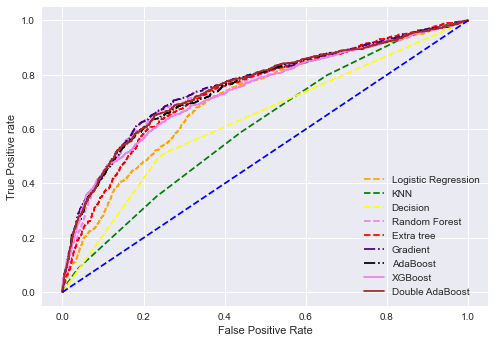

In [105]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision')
plt.plot(fpr5, tpr5, linestyle='--',color='violet', label='Random Forest')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Extra tree')
plt.plot(fpr7, tpr7, linestyle='-.',color='indigo', label='Gradient')
plt.plot(fpr8, tpr8, linestyle='-.',color='black', label='AdaBoost')
plt.plot(fpr9, tpr9, linestyle='-',color='violet', label='XGBoost')
plt.plot(fpr10, tpr10, linestyle='-',color='brown', label='Double AdaBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
# plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show()